Question 1. Explain the differences between AI, ML, Deep Learning (DL), and Data
Science (DS).

Answer : Artificial Intelligence (AI): Broad field focused on building systems that perform tasks that typically require human intelligence (reasoning, planning, perception, language). It’s the goal/umbrella.

Machine Learning (ML): A subfield of AI where systems learn patterns from data to make predictions/decisions without being explicitly programmed (e.g., linear/logistic regression, trees, SVMs).

Deep Learning (DL): A subfield of ML using multi-layer neural networks to learn complex representations directly from large datasets (e.g., CNNs for vision, RNN/Transformers for sequence).

Data Science (DS): Interdisciplinary practice of turning data into insight and value. It covers data collection, cleaning, EDA, stats, ML, visualization, communication, and decision support. DS uses ML/DL as tools; not all DS is AI.

Question 2: What are the types of machine learning? Describe each with one
real-world example.

Answer: Supervised learning: Learn from labeled examples to predict a target.
Example: Fraud detection (label = fraud/not fraud).

Unsupervised learning: Find structure in unlabeled data.
Example: Customer segmentation with K-Means.

Semi-supervised learning: Train on a small labeled set + large unlabeled set.
Example: Classifying support tickets when only some are labeled.

Self-supervised learning: Create supervisory signals from the data itself.
Example: Masked-language modeling (predict missing words).

Reinforcement learning: Agent learns by interacting with an environment to maximize reward.
Example: Dynamic pricing.

Question 3: Define overfitting, underfitting, and the bias-variance tradeoff in machine learning.

Answer: Overfitting: Model captures noise/idiosyncrasies of training data → low train error, high test error. (Too complex; high variance.)

Underfitting: Model too simple to capture signal → high error on train and test. (High bias.)

Bias–variance trade-off: Increasing model complexity typically lowers bias but raises variance. Aim for the sweet spot (via validation, regularization, early stopping, etc.) that minimizes expected generalization error.

Question 4: What are outliers in a dataset, and list three common techniques for handling them.

Answer: Outliers: Observations that deviate markedly from the bulk of the data (measurement error, rare events, heavy tails).

Winsorization / Capping

Transformations

Model-Aware methods

Question 5: Explain the process of handling missing values and mention one
imputation technique for numerical and one for categorical data.

Answer: Access missingness mechanism, profile patterns, decide between deletion vs imputation vs modeling missingness, then validate impact.

Numerical imputation - Mean/Median Imputation

Categorical Imputation - Mode Imputation or add a missing category to preserve information.



Question 6: Write a Python program that:
● Creates a synthetic imbalanced dataset with make_classification() from
sklearn.datasets.
● Prints the class distribution.

In [9]:
from sklearn.datasets import make_classification
from collections import Counter

X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=3,
    n_redundant=2,
    n_clusters_per_class=1,
    weights=[0.95, 0.05],
    random_state=42
)

print("Class distribution:", Counter(y))

Class distribution: Counter({np.int64(0): 945, np.int64(1): 55})


Question 7: Implement one-hot encoding using pandas for the following list of colors:
['Red', 'Green', 'Blue', 'Green', 'Red']. Print the resulting dataframe.


In [10]:
import pandas as pd

colors = ['Red','Green','Blue','Green','Red']
df = pd.DataFrame({'color' : colors})
one_hot = pd.get_dummies(df['color'], prefix='color')
result = pd.concat([df, one_hot], axis=1)
print(result)

   color  color_Blue  color_Green  color_Red
0    Red       False        False       True
1  Green       False         True      False
2   Blue        True        False      False
3  Green       False         True      False
4    Red       False        False       True


Question 8: Write a Python script to:
● Generate 1000 samples from a normal distribution.
● Introduce 50 random missing values.
● Fill missing values with the column mean.
● Plot a histogram before and after imputation.

Missing BEFORE: 50
Missing AFTER: 0
Mean used for imputation: 0.0986315158320281


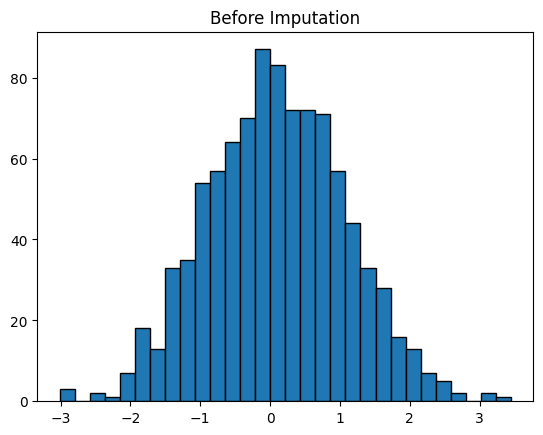

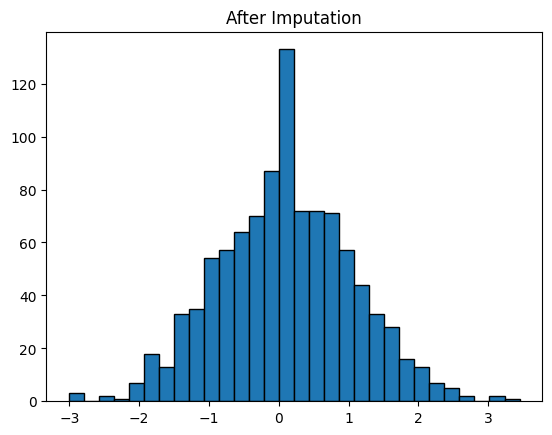

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

samples = np.random.normal(loc=0, scale=1, size=1000)
samples_series = pd.Series(samples)

missing_idx = np.random.choice(samples_series.index, size=50, replace=False)
samples_series.iloc[missing_idx] = np.nan

print("Missing BEFORE:", samples_series.isna().sum())

mean_val = samples_series.mean()
samples_imputed = samples_series.fillna(mean_val)

print("Missing AFTER:", samples_imputed.isna().sum())
print("Mean used for imputation:", mean_val)

plt.hist(samples_series.dropna(), bins=30, edgecolor='black')
plt.title("Before Imputation")
plt.show()

plt.hist(samples_imputed, bins=30, edgecolor='black')
plt.title("After Imputation")
plt.show()

Question 9: Implement Min-Max scaling on the following list of numbers [2, 5, 10, 15,
20] using sklearn.preprocessing.MinMaxScaler. Print the scaled array.

In [7]:
from sklearn.preprocessing import MinMaxScaler

numbers = np.array([[2], [5], [10], [15], [20]])
scaler = MinMaxScaler()
scaled = scaler.fit_transform(numbers)

print("Original:", numbers.ravel())
print("Scaled:", scaled.ravel())

Original: [ 2  5 10 15 20]
Scaled: [0.         0.16666667 0.44444444 0.72222222 1.        ]


Question10: You are working as a data scientist for a retail company. You receive a customer
transaction dataset that contains:
● Missing ages,
● Outliers in transaction amount,
● A highly imbalanced target (fraud vs. non-fraud),
● Categorical variables like payment method.
Explain the step-by-step data preparation plan you’d follow before training a machine learning
model. Include how you’d address missing data, outliers, imbalance, and encoding.

Answer :  Train/test (or time-based) split first

If data are temporal, use a time-ordered split (e.g., train on older months, validate on newer) to avoid leakage.

Define consistent target prevalence across folds via stratified CV on fraud.

Baseline EDA & data typing

Fix dtypes; parse dates; standardize units/currencies; identify ID/leakage fields (e.g., transaction_id, created_at).

Missing ages

Check missingness pattern by customer segment; create age_missing_flag.

Impute with median or model-based imputation (e.g., KNNImputer) using non-leaky features (no target, no post-event info).

Outliers in transaction amount

Visualize (boxplot, log-hist).

Apply log transform to stabilize skew.

Cap extreme values using IQR rule (Q1−1.5×IQR, Q3+1.5×IQR) or percentile capping (e.g., 1%/99%). Keep a amount_capped_flag.

Imbalanced target (fraud vs. non-fraud)

Use stratified CV and AUPRC / ROC-AUC with cost-sensitive thresholds.

Handle imbalance with:

Class weights in the estimator (preferred first), and/or

Resampling on the training folds only (e.g., RandomUnderSampler, SMOTE).

Calibrate probabilities (Platt/Isotonic) if decisions depend on costs.

Categorical variables (payment method, etc.)

Low-cardinality: One-hot encoding.

High-cardinality: Target/WOE encoders (with CV smoothing to prevent leakage).

Consolidate rare categories into “Other.”

Scaling & feature engineering

Scale numerical features where needed (e.g., RobustScaler for amount after log).

Add behavior features: recent spend velocity, device consistency, time-of-day, merchant risk.

Avoid target leakage by using only information available before the fraud label is determined.

Pipeline & evaluation

Implement a Pipeline that performs (imputation → encoding → scaling → resampling/weights → model).

Evaluate with stratified K-fold/time-series CV; track precision-recall, cost-weighted metrics; inspect confusion matrix at chosen threshold.